In [ ]:
from google.colab import drive
import os
import pandas as pd
from matplotlib import pyplot as plt

# Google Drive 마운트
drive.mount('/content/drive')

# 작업 디렉토리로 이동
working_dir = '/content/drive/MyDrive'
os.makedirs(working_dir, exist_ok=True)
os.chdir(working_dir)

# 파일 경로 설정
file_paths = {
    'age_gender_bkts': os.path.join(working_dir, 'age_gender_bkts.csv'),
    'countries': os.path.join(working_dir, 'countries.csv'),
    'sample_submission_NDF': os.path.join(working_dir, 'sample_submission_NDF.csv'),
    'session2': os.path.join(working_dir, 'session2.csv'),
    'test_users': os.path.join(working_dir, 'test_users.csv'),
    'train_users_2': os.path.join(working_dir, 'train_users_2.csv')
}

# 파일 읽기
age_gender_bkts = pd.read_csv(file_paths['age_gender_bkts'])
countries = pd.read_csv(file_paths['countries'])
sample_submission_NDF = pd.read_csv(file_paths['sample_submission_NDF'])
df_sessions = pd.read_csv(file_paths['session2'])
test_users = pd.read_csv(file_paths['test_users'])
df_train = pd.read_csv(file_paths['train_users_2'])

print("Files loaded from Google Drive.")


Mounted at /content/drive
Files loaded from Google Drive.


In [ ]:
df_sessions.head(5)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
df_sessions.describe()

,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


In [ ]:

df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [ ]:
df_train.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:

df_train.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


In [ ]:
df_train[['signup_method']]

,signup_method
0,facebook
1,facebook
2,basic
3,facebook
4,basic
...,...
213446,basic
213447,basic
213448,basic
213449,basic


In [ ]:
df_train[['language']]

,language
0,en
1,en
2,en
3,en
4,en
...,...
213446,en
213447,en
213448,en
213449,en


In [ ]:

df_train[['affiliate_channel']]

,affiliate_channel
0,direct
1,seo
2,direct
3,direct
4,direct
...,...
213446,sem-brand
213447,direct
213448,direct
213449,other


In [ ]:
df_temp_1 = df_train[['date_account_created','timestamp_first_active','date_first_booking']]


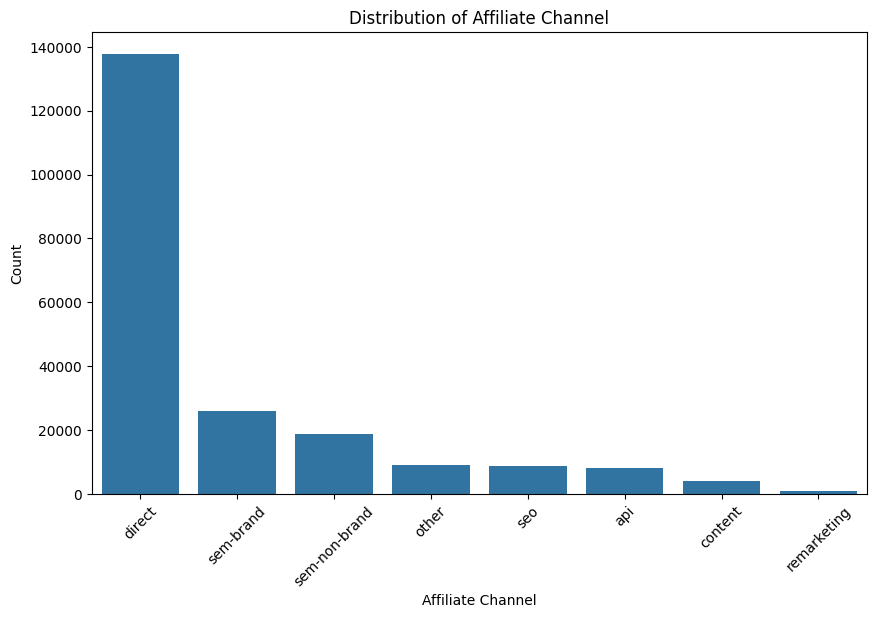

In [ ]:
import seaborn as sns
# Visualizing the distribution of the 'affiliate_channel' column
plt.figure(figsize=(10, 6))
affiliate_channel_count = df_train['affiliate_channel'].value_counts()
sns.barplot(x=affiliate_channel_count.index, y=affiliate_channel_count.values)
plt.title('Distribution of Affiliate Channel')
plt.xlabel('Affiliate Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [ ]:
# train 데이터와 session 데이터 결합
df_merged = pd.merge(df_train, df_sessions, left_on='id', right_on='user_id', how='inner')

# 예약 여부에 따른 행동 분석을 위해 예약한 사용자와 예약하지 않은 사용자 구분
# 예약한 사용자
df_booked = df_merged[df_merged['date_first_booking'].notnull()]

# 예약하지 않은 사용자
df_not_booked = df_merged[df_merged['date_first_booking'].isnull()]


<ipython-input-20-e21bc23bcd30>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_counts.index, y=action_counts.values, palette='viridis')


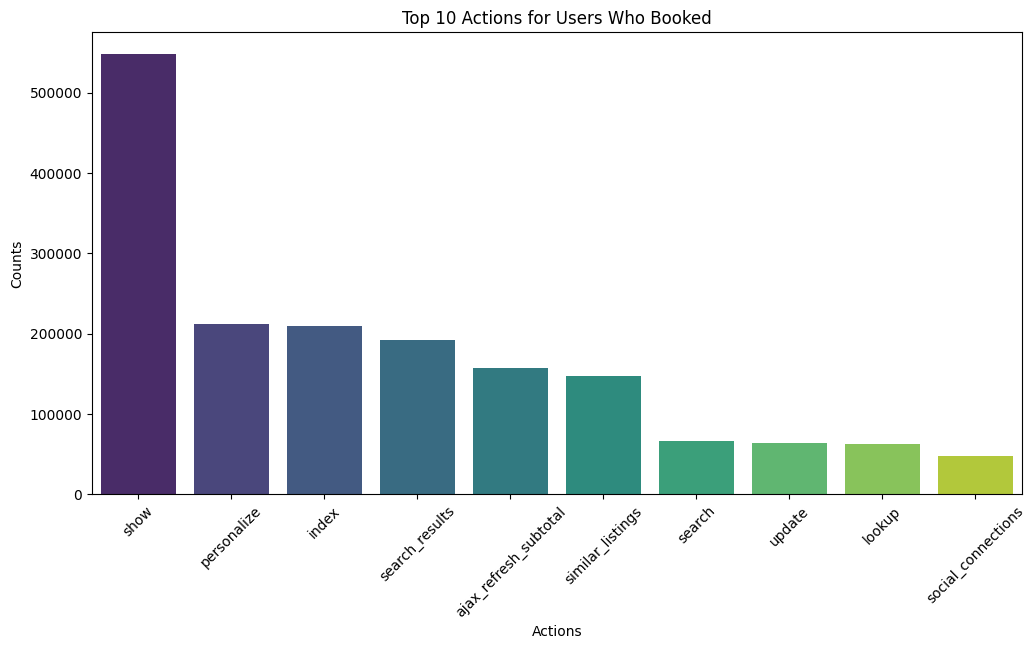

<ipython-input-20-e21bc23bcd30>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_counts.index, y=action_counts.values, palette='viridis')


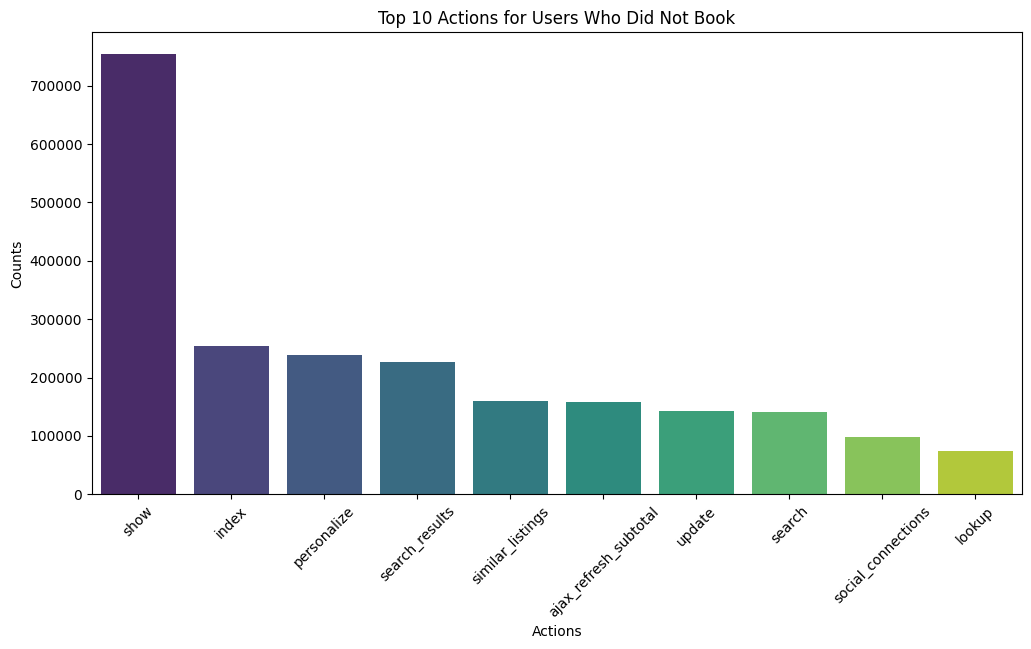

In [ ]:
# 예약 여부에 따른 행동 비교
def plot_action_distribution(df, title):
    action_counts = df['action'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=action_counts.index, y=action_counts.values, palette='viridis')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('Actions')
    plt.ylabel('Counts')
    plt.show()

# 예약한 사용자의 행동 분포
plot_action_distribution(df_booked, 'Top 10 Actions for Users Who Booked')

# 예약하지 않은 사용자의 행동 분포
plot_action_distribution(df_not_booked, 'Top 10 Actions for Users Who Did Not Book')


<ipython-input-21-fc3964a3a45c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_account_created'] = pd.to_datetime(df['date_account_created'])
<ipython-input-21-fc3964a3a45c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_first_booking'] = pd.to_datetime(df['date_first_booking'])
<ipython-input-21-fc3964a3a45c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

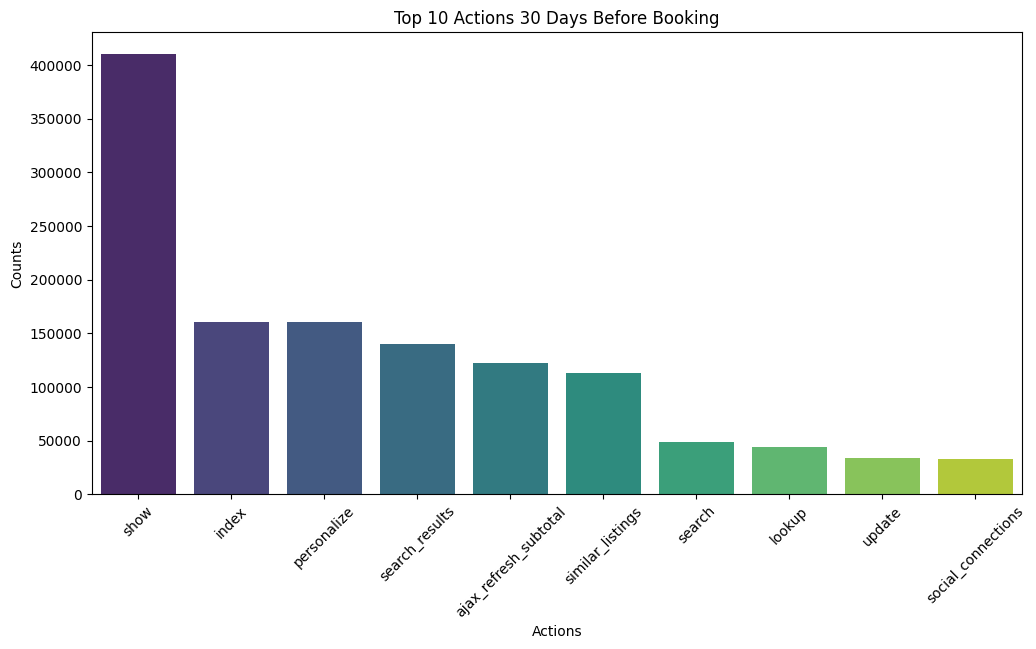

<ipython-input-20-e21bc23bcd30>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_counts.index, y=action_counts.values, palette='viridis')


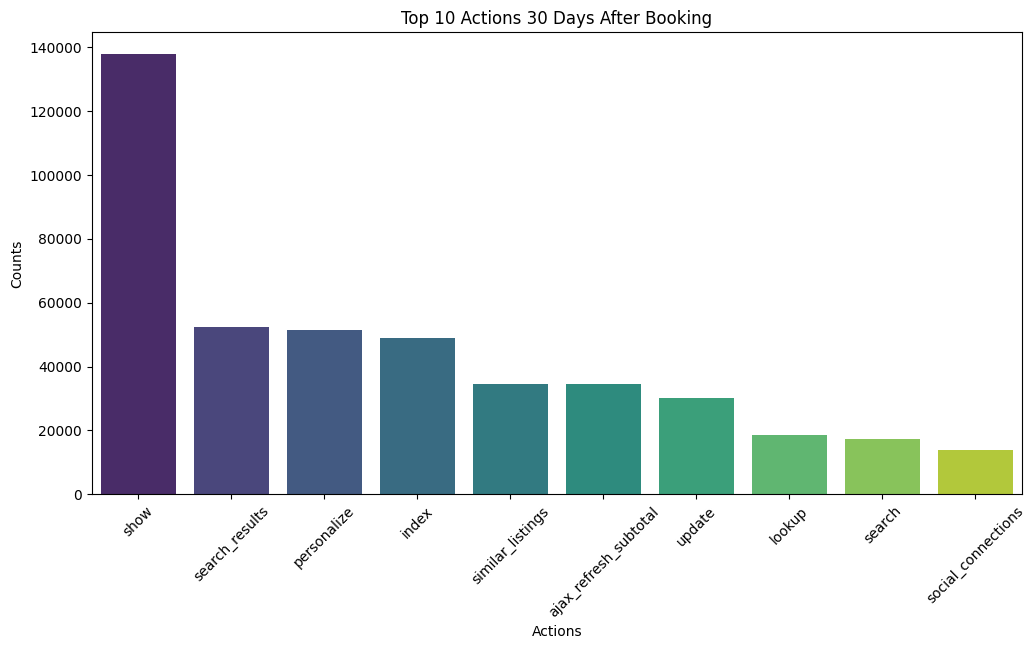

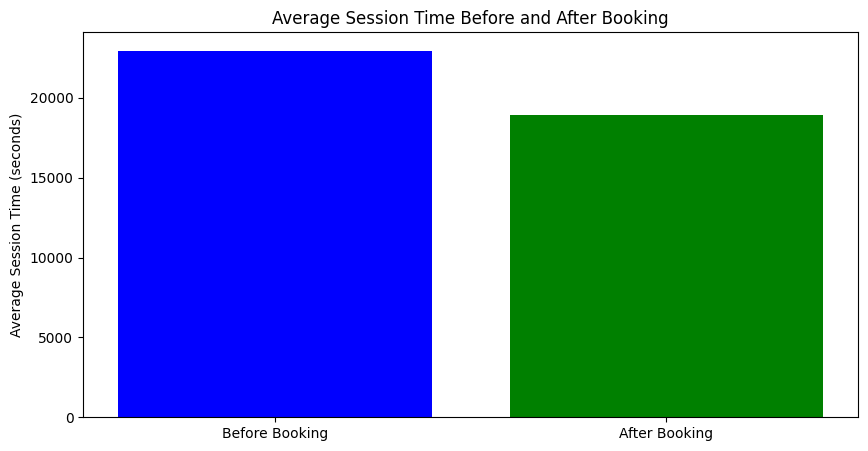

In [ ]:
# 예약 전후 행동 변화 분석
# 예약 전 30일, 예약 후 30일 데이터를 추출
def get_behavior_before_after_booking(df):
    df['date_account_created'] = pd.to_datetime(df['date_account_created'])
    df['date_first_booking'] = pd.to_datetime(df['date_first_booking'])
    df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active'], format='%Y%m%d%H%M%S')

    df_before_booking = df[(df['date_first_booking'] - df['date_account_created']).dt.days <= 30]
    df_after_booking = df[(df['date_first_booking'] - df['date_account_created']).dt.days > 30]

    return df_before_booking, df_after_booking

df_before_booking, df_after_booking = get_behavior_before_after_booking(df_booked)

# 예약 전 행동 분포
plot_action_distribution(df_before_booking, 'Top 10 Actions 30 Days Before Booking')

# 예약 후 행동 분포
plot_action_distribution(df_after_booking, 'Top 10 Actions 30 Days After Booking')

# 추가 분석: 예약 전후 평균 세션 시간 비교
def compare_session_time(df_before, df_after):
    avg_session_before = df_before['secs_elapsed'].mean()
    avg_session_after = df_after['secs_elapsed'].mean()

    plt.figure(figsize=(10, 5))
    plt.bar(['Before Booking', 'After Booking'], [avg_session_before, avg_session_after], color=['blue', 'green'])
    plt.title('Average Session Time Before and After Booking')
    plt.ylabel('Average Session Time (seconds)')
    plt.show()

compare_session_time(df_before_booking, df_after_booking)

In [ ]:
# 데이터 타입 변환 및 날짜 관련 데이터 처리
df_merged['date_account_created'] = pd.to_datetime(df_merged['date_account_created'])
df_merged['timestamp_first_active'] = pd.to_datetime(df_merged['timestamp_first_active'], format='%Y%m%d%H%M%S')


In [ ]:
print(df_merged.head())

           id date_account_created timestamp_first_active date_first_booking  \
0  d1mm9tcy42           2014-01-01    2014-01-01 00:09:36         2014-01-04   
1  d1mm9tcy42           2014-01-01    2014-01-01 00:09:36         2014-01-04   
2  d1mm9tcy42           2014-01-01    2014-01-01 00:09:36         2014-01-04   
3  d1mm9tcy42           2014-01-01    2014-01-01 00:09:36         2014-01-04   
4  d1mm9tcy42           2014-01-01    2014-01-01 00:09:36         2014-01-04   

  gender   age signup_method  signup_flow language affiliate_channel  ...  \
0   MALE  62.0         basic            0       en     sem-non-brand  ...   
1   MALE  62.0         basic            0       en     sem-non-brand  ...   
2   MALE  62.0         basic            0       en     sem-non-brand  ...   
3   MALE  62.0         basic            0       en     sem-non-brand  ...   
4   MALE  62.0         basic            0       en     sem-non-brand  ...   

  signup_app first_device_type first_browser country_des

<ipython-input-24-b8d210b8659b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=action_counts.index, y=action_counts.values, palette='viridis')


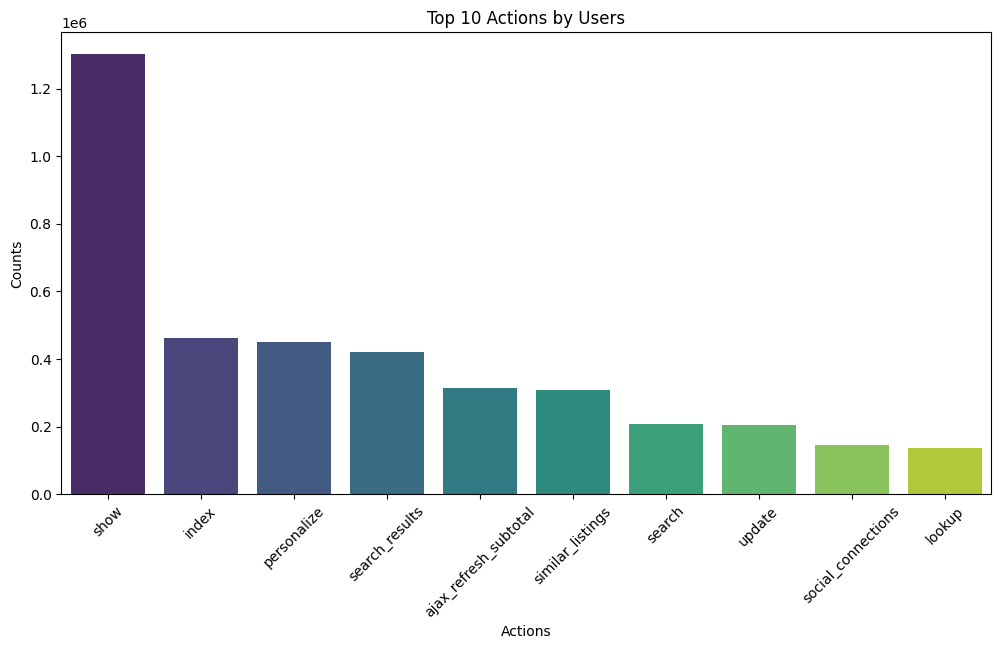

In [ ]:
# 행동별 발생 횟수 계산
action_counts = df_merged['action'].value_counts().head(10)

# 상위 10개 행동에 대한 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=action_counts.index, y=action_counts.values, palette='viridis')
plt.title('Top 10 Actions by Users')
plt.xticks(rotation=45)
plt.xlabel('Actions')
plt.ylabel('Counts')
plt.show()

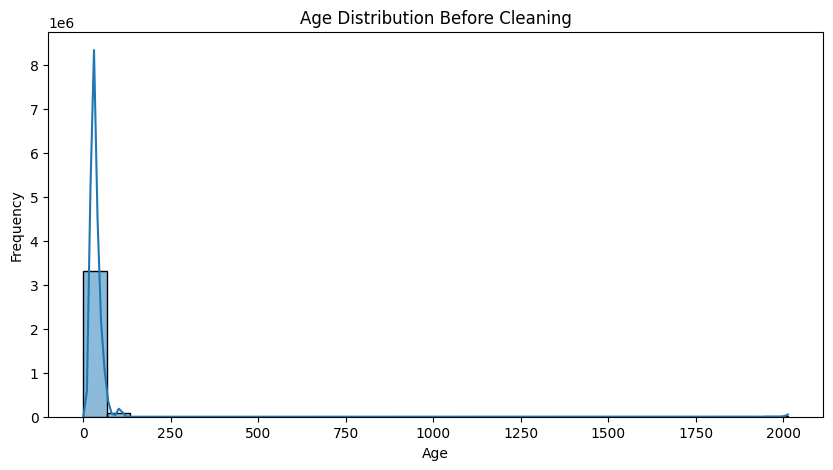

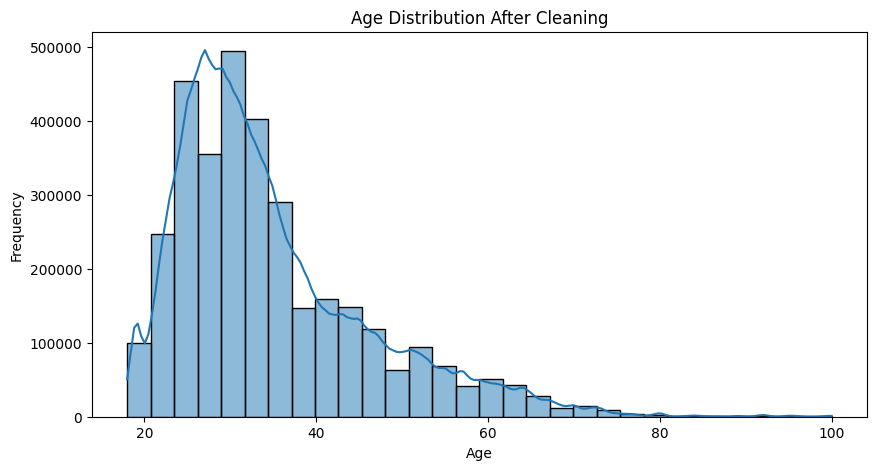

0


In [ ]:
# 나이 데이터의 분포 확인
plt.figure(figsize=(10, 5))
sns.histplot(df_merged['age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution Before Cleaning')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 합리적인 나이 범위로 필터링 (예: 18세에서 100세 사이)
df_merged_cleaned = df_merged[(df_merged['age'] >= 18) & (df_merged['age'] <= 100)]

# 필터링 후 나이 데이터의 분포 확인
plt.figure(figsize=(10, 5))
sns.histplot(df_merged_cleaned['age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution After Cleaning')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 결측치 확인
print(df_merged_cleaned['age'].isna().sum())

In [ ]:
# 성별 결측치 확인
print(f"Gender missing values before cleaning: {df_merged['gender'].isna().sum()}")

# 성별 결측치 제거 및 '-unknown-' 값을 제외
df_merged_cleaned = df_merged[df_merged['gender'].notna() & (df_merged['gender'] != '-unknown-')].copy()

# 성별 결측치 제거 후 확인
print(f"Gender missing values after cleaning: {df_merged_cleaned['gender'].isna().sum()}")


Gender missing values before cleaning: 0
Gender missing values after cleaning: 0


<ipython-input-16-6dbe17b9c6b0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_specific_action, x='country_destination', order=df_specific_action['country_destination'].value_counts().index, palette='viridis')


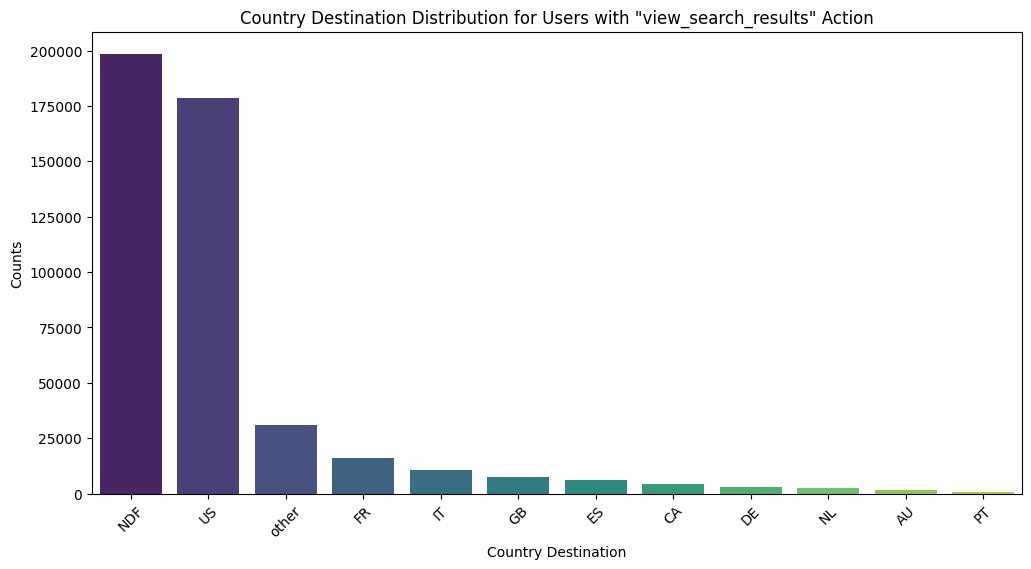

In [ ]:
# 특정 행동의 세부 사항과 예약 목적지 간의 관계 분석
# 예: "view_search_results" 행동의 세부 사항 분석
specific_action = "view_search_results"
df_specific_action = df_merged_cleaned[df_merged_cleaned['action_detail'] == specific_action]

# "view_search_results" 행동이 많은 사용자의 예약 목적지 분포
plt.figure(figsize=(12, 6))
sns.countplot(data=df_specific_action, x='country_destination', order=df_specific_action['country_destination'].value_counts().index, palette='viridis')
plt.title(f'Country Destination Distribution for Users with "{specific_action}" Action')
plt.xticks(rotation=45)
plt.xlabel('Country Destination')
plt.ylabel('Counts')
plt.show()


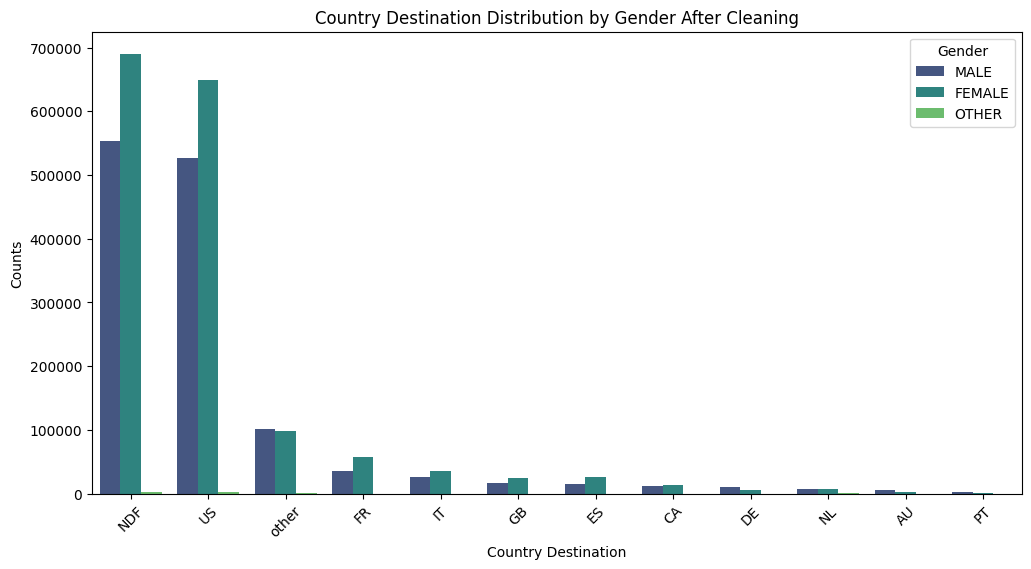

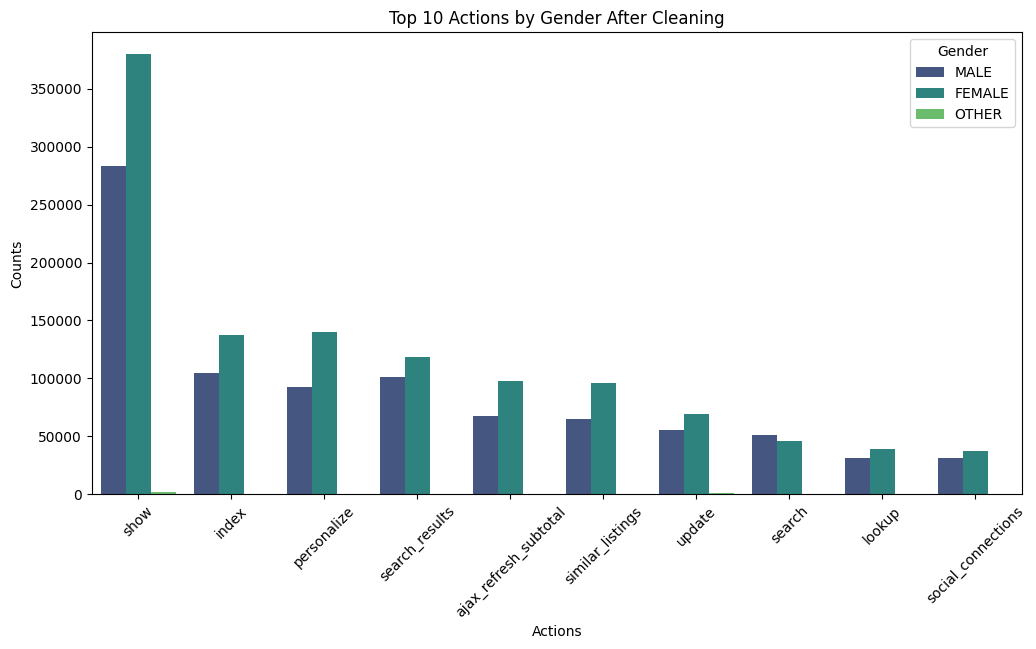

In [ ]:
# 성별에 따른 예약 목적지 분포
plt.figure(figsize=(12, 6))
sns.countplot(data=df_merged_cleaned, x='country_destination', hue='gender', order=df_merged_cleaned['country_destination'].value_counts().index, palette='viridis')
plt.title('Country Destination Distribution by Gender After Cleaning')
plt.xticks(rotation=45)
plt.xlabel('Country Destination')
plt.ylabel('Counts')
plt.legend(title='Gender')
plt.show()

# 성별에 따른 주요 행동 분석
plt.figure(figsize=(12, 6))
sns.countplot(data=df_merged_cleaned, x='action', hue='gender', order=df_merged_cleaned['action'].value_counts().head(10).index, palette='viridis')
plt.title('Top 10 Actions by Gender After Cleaning')
plt.xticks(rotation=45)
plt.xlabel('Actions')
plt.ylabel('Counts')
plt.legend(title='Gender')
plt.show()


In [ ]:
# timestamp -> date time으로 바꾸기

<ipython-input-30-976b984d8765>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_booked, x='action', order=df_booked['action'].value_counts().head(10).index, palette='viridis')


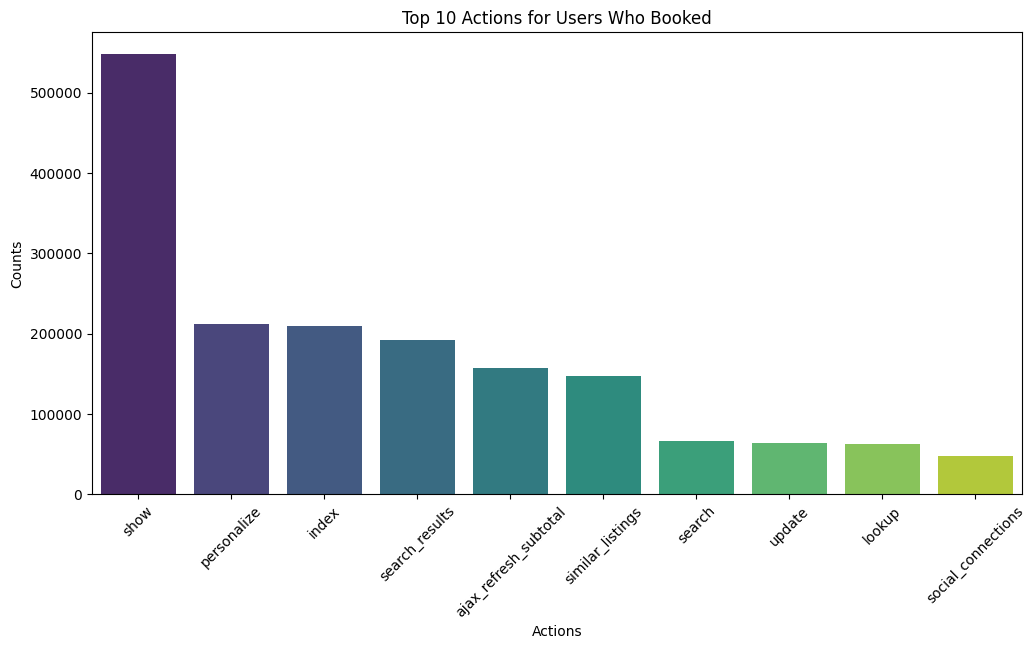

<ipython-input-30-976b984d8765>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_not_booked, x='action', order=df_not_booked['action'].value_counts().head(10).index, palette='viridis')


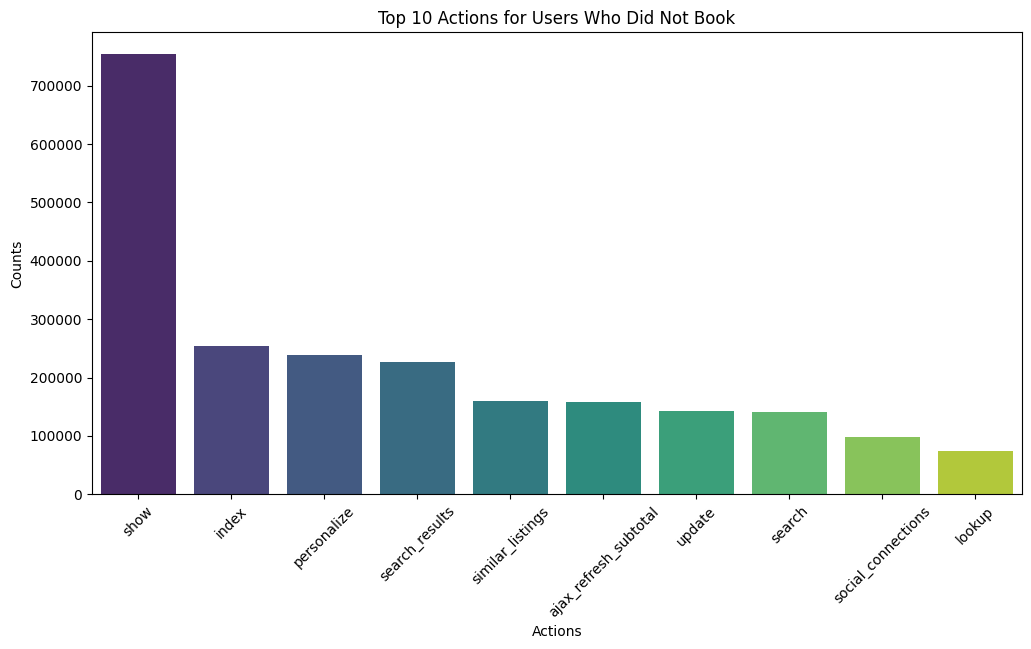

In [ ]:
# 예약한 사용자와 예약하지 않은 사용자의 행동 분포 분석
df_merged['booking_status'] = df_merged['date_first_booking'].notnull().astype(int)
# 예약한 사용자 행동 분포
df_booked = df_merged[df_merged['booking_status'] == 1]
plt.figure(figsize=(12, 6))
sns.countplot(data=df_booked, x='action', order=df_booked['action'].value_counts().head(10).index, palette='viridis')
plt.title('Top 10 Actions for Users Who Booked')
plt.xticks(rotation=45)
plt.xlabel('Actions')
plt.ylabel('Counts')
plt.show()

# 예약하지 않은 사용자 행동 분포
df_not_booked = df_merged[df_merged['booking_status'] == 0]
plt.figure(figsize=(12, 6))
sns.countplot(data=df_not_booked, x='action', order=df_not_booked['action'].value_counts().head(10).index, palette='viridis')
plt.title('Top 10 Actions for Users Who Did Not Book')
plt.xticks(rotation=45)
plt.xlabel('Actions')
plt.ylabel('Counts')
plt.show()


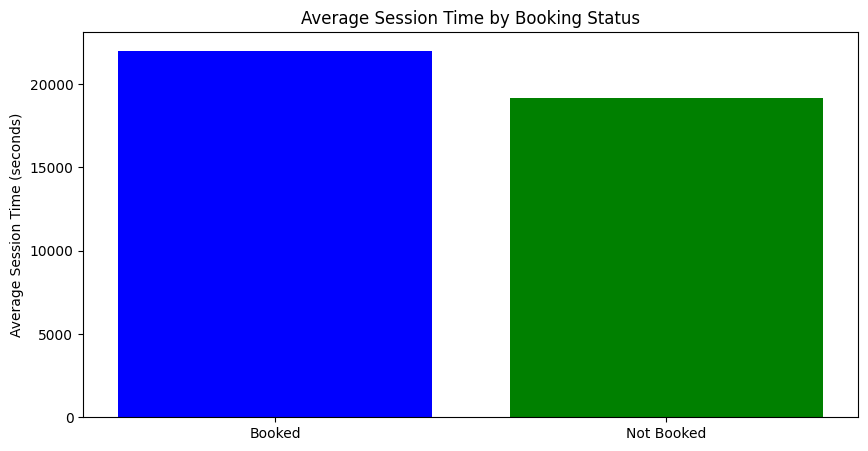

In [ ]:
# 예약 여부에 따른 평균 세션 시간 비교
def compare_session_time(df_booked, df_not_booked):
    avg_session_booked = df_booked['secs_elapsed'].mean()
    avg_session_not_booked = df_not_booked['secs_elapsed'].mean()

    plt.figure(figsize=(10, 5))
    plt.bar(['Booked', 'Not Booked'], [avg_session_booked, avg_session_not_booked], color=['blue', 'green'])
    plt.title('Average Session Time by Booking Status')
    plt.ylabel('Average Session Time (seconds)')
    plt.show()

compare_session_time(df_booked, df_not_booked)


In [ ]:
# 데이터 크기 확인
print("Train Users 데이터 크기:", df_train.shape)
print("Sessions 데이터 크기:", df_sessions.shape)

# Train Users 데이터 예시
print("\nTrain Users 데이터 예시:")
print(df_train.head())

# Sessions 데이터 예시
print("\nSessions 데이터 예시:")
print(df_sessions.head())


Train Users 데이터 크기: (213451, 16)
Sessions 데이터 크기: (10567737, 6)

Train Users 데이터 예시:
           id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn           2010-06-28          20090319043255                NaN   
1  820tgsjxq7           2011-05-25          20090523174809                NaN   
2  4ft3gnwmtx           2010-09-28          20090609231247         2010-08-02   
3  bjjt8pjhuk           2011-12-05          20091031060129         2012-09-08   
4  87mebub9p4           2010-09-14          20091208061105         2010-02-18   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0   

In [ ]:
# 모든 가능한 행동을 살펴보고 더 포괄적인 단계 정의 추가
print(df_sessions['action'].value_counts())


action
show              2768278
index              843699
search_results     725226
personalize        706824
search             536057
                   ...   
deauthorize             1
events                  1
reactivate              1
desks                   1
nyan                    1
Name: count, Length: 359, dtype: int64


In [ ]:
# 퍼널 단계 정의 재검토 및 수정
df_sessions['funnel_stage'] = 'None'

# 사이트 방문
df_sessions.loc[df_sessions['action'].isin(['search', 'view_search_results']), 'funnel_stage'] = 'Site Visit'

# 검색 결과 조회
df_sessions.loc[df_sessions['action'].isin(['view_search_results', 'filter_search_results', 'sort_search_results']), 'funnel_stage'] = 'Search Results'

# 숙소 상세 조회
df_sessions.loc[df_sessions['action'].isin(['view_listing', 'view_wishlist', 'view_property', 'show_reviews']), 'funnel_stage'] = 'Listing Details'

# 예약 시작
df_sessions.loc[df_sessions['action'].isin(['booking_request', 'book_it', 'message_post']), 'funnel_stage'] = 'Initiate Booking'

# 예약 검토 및 결제
df_sessions.loc[df_sessions['action'].isin(['enter_payment_info', 'confirm_payment']), 'funnel_stage'] = 'Review & Payment'

# 예약 완료
df_sessions.loc[df_sessions['action'].isin(['booking_confirmed', 'complete_booking']), 'funnel_stage'] = 'Booking Confirmation'

# 각 단계별 사용자 수 다시 계산
funnel_counts = df_sessions.groupby('funnel_stage')['user_id'].nunique().reset_index()
funnel_counts.columns = ['Stage', 'User Count']

# 전환율 계산
funnel_counts['Conversion Rate'] = funnel_counts['User Count'].shift(-1) / funnel_counts['User Count']

# 퍼널 분석 결과 출력
print(funnel_counts)


        Stage  User Count  Conversion Rate
0        None      135482         0.263474
1  Site Visit       35696              NaN


In [ ]:
import pandas as pd

# 데이터 로드
df_sessions = pd.read_csv('/content/drive/MyDrive/session2.csv')

# 데이터 크기 확인
print("Sessions 데이터 크기:", df_sessions.shape)

# 데이터의 첫 몇 행 확인
print("Sessions 데이터 예시:")
print(df_sessions.head())

# 데이터의 기본 정보 확인
print("\n데이터 정보:")
print(df_sessions.info())

# 결측치 확인
print("\n결측치 확인:")
print(df_sessions.isnull().sum())

# 주요 통계 확인
print("\n기본 통계:")
print(df_sessions.describe())


In [ ]:
import pandas as pd

# 각 열의 분포를 데이터프레임으로 변환
action_counts = df_sessions['action'].value_counts().reset_index()
action_counts.columns = ['Action', 'Count']

action_type_counts = df_sessions['action_type'].value_counts().reset_index()
action_type_counts.columns = ['Action Type', 'Count']

action_detail_counts = df_sessions['action_detail'].value_counts().reset_index()
action_detail_counts.columns = ['Action Detail', 'Count']

device_type_counts = df_sessions['device_type'].value_counts().reset_index()
device_type_counts.columns = ['Device Type', 'Count']

# 각 데이터프레임 출력 (상위 몇 개만 출력)
print("Action Counts (상위 20개):")
print(action_counts.head(20))

print("\nAction Type Counts (전체):")
print(action_type_counts)

print("\nAction Detail Counts (상위 20개):")
print(action_detail_counts.head(20))

print("\nDevice Type Counts (전체):")
print(device_type_counts)


Action Counts (상위 20개):
                   Action    Count
0                    show  2768278
1                   index   843699
2          search_results   725226
3             personalize   706824
4                  search   536057
5   ajax_refresh_subtotal   487744
6                  update   365130
7        similar_listings   364624
8      social_connections   339000
9                 reviews   320591
10                 active   188036
11    similar_listings_v2   168788
12                 lookup   162041
13                 create   155887
14              dashboard   152952
15         header_userpic   141830
16            collections   124417
17                   edit   109083
18              campaigns   105028
19        track_page_view    81117

Action Type Counts (전체):
        Action Type    Count
0              view  3560902
1              data  2103770
2             click  1996183
3         -unknown-  1031170
4            submit   623357
5      message_post    87103
6  partner_c

In [ ]:
# 데이터프레임을 CSV 파일로 저장
action_counts.to_csv('/content/drive/MyDrive/action_counts.csv', index=False)
action_type_counts.to_csv('/content/drive/MyDrive/action_type_counts.csv', index=False)
action_detail_counts.to_csv('/content/drive/MyDrive/action_detail_counts.csv', index=False)
device_type_counts.to_csv('/content/drive/MyDrive/device_type_counts.csv', index=False)

print("CSV 파일로 저장 완료.")


CSV 파일로 저장 완료.


In [ ]:
# 각 단계에 해당하는 행동 정의
site_visit_actions = ['index', 'view_search_results', 'personalize', 'show']
initiate_search_actions = ['search', 'search_results']
view_search_results_actions = ['view_search_results', 'filter_search_results', 'sort_search_results']
view_listing_details_actions = ['view_listing', 'view_wishlist', 'view_property', 'show_reviews']
initiate_booking_actions = ['booking_request', 'book_it', 'message_post']
review_payment_actions = ['enter_payment_info', 'confirm_payment']
booking_confirmation_actions = ['booking_confirmed', 'complete_booking']


In [ ]:
import pandas as pd

# 데이터 로드
df_sessions = pd.read_csv('/content/drive/MyDrive/session2.csv')

# 퍼널 단계 추가
df_sessions['funnel_stage'] = 'None'
df_sessions.loc[df_sessions['action'].isin(site_visit_actions), 'funnel_stage'] = 'Site Visit'
df_sessions.loc[df_sessions['action'].isin(initiate_search_actions), 'funnel_stage'] = 'Initiate Search'
df_sessions.loc[df_sessions['action'].isin(view_search_results_actions), 'funnel_stage'] = 'View Search Results'
df_sessions.loc[df_sessions['action'].isin(view_listing_details_actions), 'funnel_stage'] = 'View Listing Details'
df_sessions.loc[df_sessions['action'].isin(initiate_booking_actions), 'funnel_stage'] = 'Initiate Booking'
df_sessions.loc[df_sessions['action'].isin(review_payment_actions), 'funnel_stage'] = 'Review & Payment'
df_sessions.loc[df_sessions['action'].isin(booking_confirmation_actions), 'funnel_stage'] = 'Booking Confirmation'

# 각 단계별 사용자 수 계산
funnel_counts = df_sessions.groupby('funnel_stage')['user_id'].nunique().reset_index()
funnel_counts.columns = ['Stage', 'User Count']

# 전환율 계산
funnel_counts['Conversion Rate'] = funnel_counts['User Count'].shift(-1) / funnel_counts['User Count']

# 퍼널 분석 결과 출력
print(funnel_counts)


             Stage  User Count  Conversion Rate
0  Initiate Search       79835         1.696223
1             None      135418         0.874913
2       Site Visit      118479              NaN


In [ ]:
from google.colab import drive
import os
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')

# 작업 디렉토리로 이동
working_dir = '/content/drive/MyDrive'
os.makedirs(working_dir, exist_ok=True)
os.chdir(working_dir)

# 파일 경로 설정
session_file_path = os.path.join(working_dir, 'session2.csv')
output_dir = os.path.join(working_dir, 'session_chunks')
os.makedirs(output_dir, exist_ok=True)

# CSV 파일 크기 계산
file_size_mb = os.path.getsize(session_file_path) / (1024 * 1024)
print(f"The size of the file is {file_size_mb:.2f} MB.")

# CSV 파일 분할하기
chunk_size = 10 * 1024 * 1024  # 10 MB

# Chunk size in rows. This is a rough estimate as rows can vary in size.
# We will assume an average size of 100 bytes per row. Adjust as needed.
average_row_size = 100  # bytes
chunk_size_rows = chunk_size // average_row_size

# 파일 분할
chunk_no = 0
for chunk in pd.read_csv(session_file_path, chunksize=chunk_size_rows):
    chunk_file_name = f"{output_dir}/session_chunk_{chunk_no}.csv"
    chunk.to_csv(chunk_file_name, index=False)
    print(f"Created {chunk_file_name} with {len(chunk)} rows.")
    chunk_no += 1

print(f"File split into {chunk_no} chunks.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The size of the file is 602.38 MB.
Created /content/drive/MyDrive/session_chunks/session_chunk_0.csv with 104857 rows.
Created /content/drive/MyDrive/session_chunks/session_chunk_1.csv with 104857 rows.
Created /content/drive/MyDrive/session_chunks/session_chunk_2.csv with 104857 rows.
Created /content/drive/MyDrive/session_chunks/session_chunk_3.csv with 104857 rows.
Created /content/drive/MyDrive/session_chunks/session_chunk_4.csv with 104857 rows.
Created /content/drive/MyDrive/session_chunks/session_chunk_5.csv with 104857 rows.
Created /content/drive/MyDrive/session_chunks/session_chunk_6.csv with 104857 rows.
Created /content/drive/MyDrive/session_chunks/session_chunk_7.csv with 104857 rows.
Created /content/drive/MyDrive/session_chunks/session_chunk_8.csv with 104857 rows.
Created /content/drive/MyDrive/session_chunks/session_chunk_9.csv with 104857 ro

In [ ]:
import pandas as pd

# CSV 파일 읽기
file_path = '/content/drive/MyDrive/session2.csv'
df_sessions = pd.read_csv(file_path)

# XLSX로 저장 (openpyxl 엔진 사용)
xlsx_file_path = '/content/drive/MyDrive/session2.xlsx'
df_sessions.to_excel(xlsx_file_path, index=False, engine='openpyxl')

print("CSV 파일을 XLSX 형식으로 변환하여 저장했습니다.")


ValueError: This sheet is too large! Your sheet size is: 10567737, 6 Max sheet size is: 1048576, 16384

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files loaded from Google Drive.


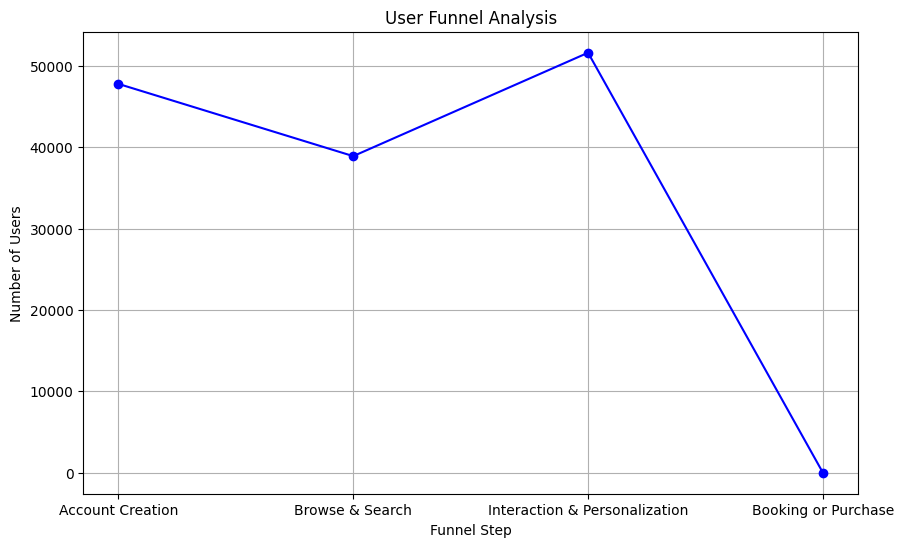

In [ ]:
from google.colab import drive
import os
import pandas as pd
from matplotlib import pyplot as plt

# Google Drive 마운트
drive.mount('/content/drive')

# 작업 디렉토리로 이동
working_dir = '/content/drive/MyDrive'
os.makedirs(working_dir, exist_ok=True)
os.chdir(working_dir)

# 파일 경로 설정
file_paths = {
    'sessions': os.path.join(working_dir, 'session2.csv'),  # session 데이터 경로
    'train_users_2': os.path.join(working_dir, 'train_users_2.csv')  # users 데이터 경로
}

# 파일 읽기
df_sessions = pd.read_csv(file_paths['sessions'])
df_train = pd.read_csv(file_paths['train_users_2'])

print("Files loaded from Google Drive.")

# 데이터 병합 (사용자 ID를 기준으로)
merged_df = pd.merge(df_sessions, df_train, left_on='user_id', right_on='id', how='inner')

# 주요 퍼널 단계 정의
funnel_steps = {
    'Account Creation': ['index', 'signup'],
    'Browse & Search': ['search_results', 'view_search_results', 'search'],
    'Interaction & Personalization': ['personalize', 'user_profile', 'reviews', 'wishlist', 'similar_listings'],
    'Booking or Purchase': ['booking_request', 'checkout', 'payment']
}

# 각 단계별로 사용자 수 계산
funnel_counts = {}
for step, actions in funnel_steps.items():
    users_in_step = merged_df[merged_df['action'].isin(actions)]['user_id'].nunique()
    funnel_counts[step] = users_in_step

# 결과 시각화
steps = list(funnel_counts.keys())
counts = list(funnel_counts.values())

plt.figure(figsize=(10, 6))
plt.plot(steps, counts, marker='o', linestyle='-', color='b')
plt.xlabel('Funnel Step')
plt.ylabel('Number of Users')
plt.title('User Funnel Analysis')
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files loaded from Google Drive.


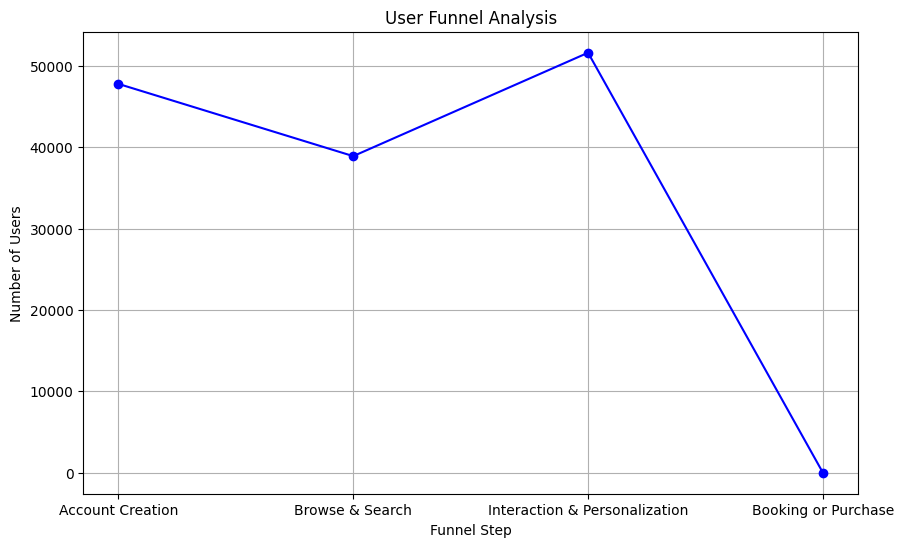

Conversion rate from Account Creation to Browse & Search: 81.42%
Conversion rate from Browse & Search to Interaction & Personalization: 132.66%
Conversion rate from Interaction & Personalization to Booking or Purchase: 0.00%


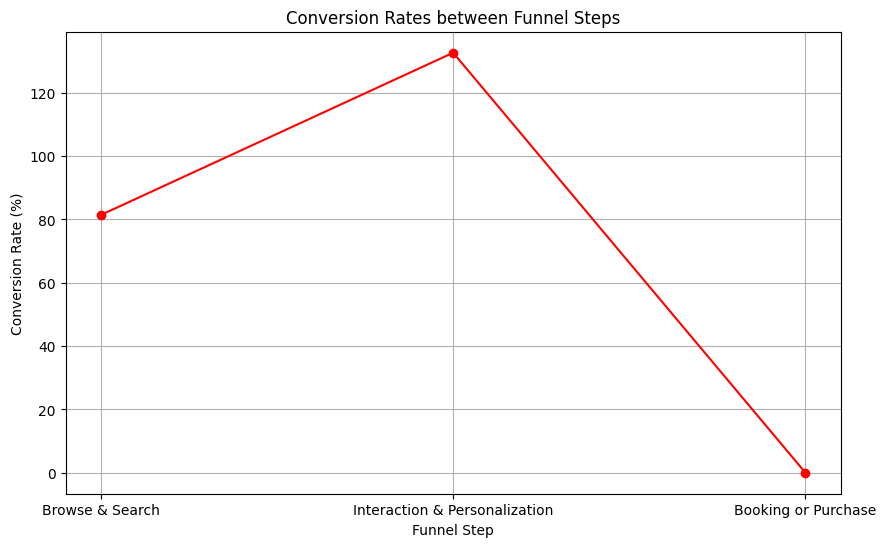

In [ ]:
from google.colab import drive
import os
import pandas as pd
from matplotlib import pyplot as plt

# Google Drive 마운트
drive.mount('/content/drive')

# 작업 디렉토리로 이동
working_dir = '/content/drive/MyDrive'
os.makedirs(working_dir, exist_ok=True)
os.chdir(working_dir)

# 파일 경로 설정
file_paths = {
    'sessions': os.path.join(working_dir, 'session2.csv'),  # session 데이터 경로
    'train_users_2': os.path.join(working_dir, 'train_users_2.csv')  # users 데이터 경로
}

# 파일 읽기
df_sessions = pd.read_csv(file_paths['sessions'])
df_train = pd.read_csv(file_paths['train_users_2'])

print("Files loaded from Google Drive.")

# 데이터 병합 (사용자 ID를 기준으로)
merged_df = pd.merge(df_sessions, df_train, left_on='user_id', right_on='id', how='inner')

# 중복된 사용자 제거
# 각 퍼널 단계에서 중복 사용자를 제거하여 고유 사용자 수를 계산
unique_users_per_step = {}

# 주요 퍼널 단계 정의
funnel_steps = {
    'Account Creation': ['index', 'signup'],
    'Browse & Search': ['search_results', 'view_search_results', 'search'],
    'Interaction & Personalization': ['personalize', 'user_profile', 'reviews', 'wishlist', 'similar_listings'],
    'Booking or Purchase': ['booking_request', 'checkout', 'payment']
}

# 각 단계별로 고유 사용자 수 계산
for step, actions in funnel_steps.items():
    # 해당 단계에 해당하는 사용자 추출
    users_in_step = merged_df[merged_df['action'].isin(actions)]['user_id'].drop_duplicates()
    unique_users_per_step[step] = users_in_step

# 단계별로 사용자 수를 계산하고 리스트로 변환
funnel_counts = {step: len(users) for step, users in unique_users_per_step.items()}

# 결과 시각화
steps = list(funnel_counts.keys())
counts = list(funnel_counts.values())

plt.figure(figsize=(10, 6))
plt.plot(steps, counts, marker='o', linestyle='-', color='b')
plt.xlabel('Funnel Step')
plt.ylabel('Number of Users')
plt.title('User Funnel Analysis')
plt.grid(True)
plt.show()

# 각 단계별 전환율 계산
conversion_rates = []
for i in range(len(counts) - 1):
    conversion_rate = counts[i + 1] / counts[i] * 100  # 백분율 계산
    conversion_rates.append(conversion_rate)
    print(f"Conversion rate from {steps[i]} to {steps[i+1]}: {conversion_rate:.2f}%")

# 전환율 시각화
plt.figure(figsize=(10, 6))
plt.plot(steps[1:], conversion_rates, marker='o', linestyle='-', color='r')
plt.xlabel('Funnel Step')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rates between Funnel Steps')
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files loaded from Google Drive.
Merged Data Sample:
      user_id          action action_type        action_detail  \
0  d1mm9tcy42          lookup         NaN                  NaN   
1  d1mm9tcy42  search_results       click  view_search_results   
2  d1mm9tcy42          lookup         NaN                  NaN   
3  d1mm9tcy42  search_results       click  view_search_results   
4  d1mm9tcy42          lookup         NaN                  NaN   

       device_type  secs_elapsed          id date_account_created  \
0  Windows Desktop         319.0  d1mm9tcy42           2014-01-01   
1  Windows Desktop       67753.0  d1mm9tcy42           2014-01-01   
2  Windows Desktop         301.0  d1mm9tcy42           2014-01-01   
3  Windows Desktop       22141.0  d1mm9tcy42           2014-01-01   
4  Windows Desktop         435.0  d1mm9tcy42           2014-01-01   

   time

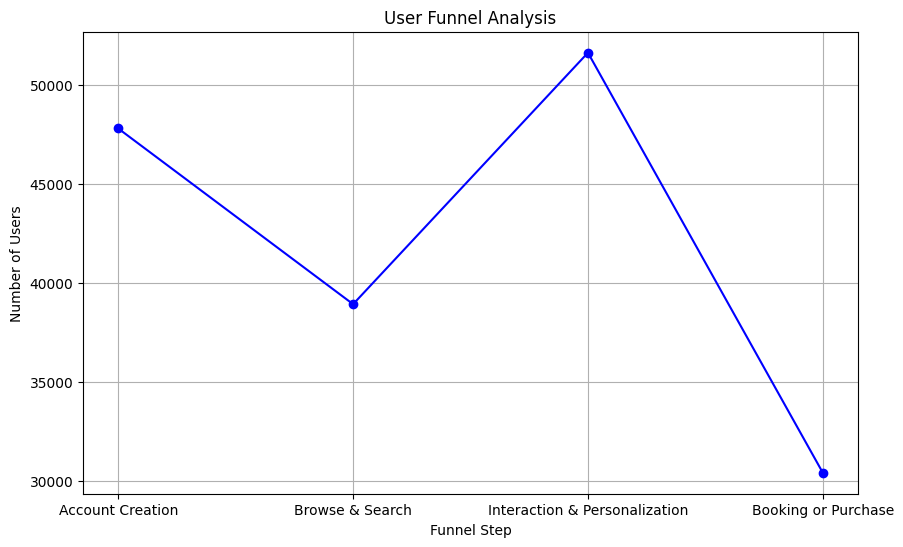

Conversion rate from Account Creation to Browse & Search: 81.42%
Conversion rate from Browse & Search to Interaction & Personalization: 132.66%
Conversion rate from Interaction & Personalization to Booking or Purchase: 58.88%


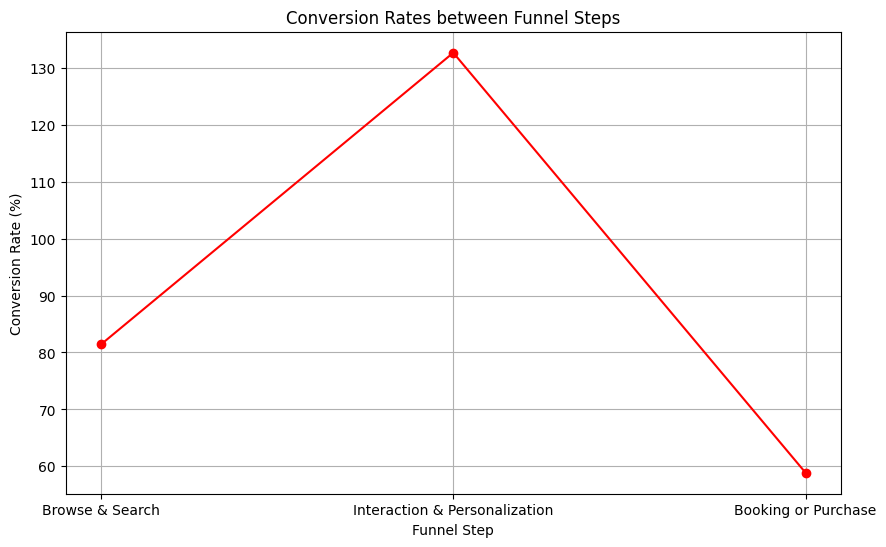

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt


from google.colab import drive
drive.mount('/content/drive')

working_dir = '/content/drive/MyDrive'
os.chdir(working_dir)

file_paths = {
    'sessions': os.path.join(working_dir, 'session2.csv'),
    'train_users_2': os.path.join(working_dir, 'train_users_2.csv')
}

df_sessions = pd.read_csv(file_paths['sessions'])
df_train = pd.read_csv(file_paths['train_users_2'])

print("Files loaded from Google Drive.")

# 데이터 병합
merged_df = pd.merge(df_sessions, df_train, left_on='user_id', right_on='id', how='inner')

print("Merged Data Sample:")
print(merged_df.head(), "\n")

# 주요 퍼널 단계 정의
funnel_steps = {
    'Account Creation': ['index', 'signup'],
    'Browse & Search': ['search_results', 'view_search_results', 'search'],
    'Interaction & Personalization': ['personalize', 'user_profile', 'similar_listings', 'listing_reviews', 'wishlist', 'reviews'],
    'Booking or Purchase': ['booking_request', 'checkout', 'payment', 'update', 'change_trip_characteristics', 'wishlist_content_update', 'submit', 'booking_response']
}

# 각 단계별로 고유 사용자 수 계산
unique_users_per_step = {}

for step, actions in funnel_steps.items():
    users_in_step = merged_df[merged_df['action'].isin(actions)]['user_id'].drop_duplicates()
    unique_users_per_step[step] = users_in_step
    print(f"Step: {step}, Number of users: {len(users_in_step)}")

# 단계별로 사용자 수를 계산하고 리스트로 변환
funnel_counts = {step: len(users) for step, users in unique_users_per_step.items()}
print("Funnel Counts:", funnel_counts)

# 결과 시각화
steps = list(funnel_counts.keys())
counts = list(funnel_counts.values())

plt.figure(figsize=(10, 6))
plt.plot(steps, counts, marker='o', linestyle='-', color='b')
plt.xlabel('Funnel Step')
plt.ylabel('Number of Users')
plt.title('User Funnel Analysis')
plt.grid(True)
plt.show()

# 각 단계별 전환율 계산
conversion_rates = []
for i in range(len(counts) - 1):
    conversion_rate = (counts[i + 1] / counts[i]) * 100 if counts[i] != 0 else 0  # 백분율 계산
    conversion_rates.append(conversion_rate)
    print(f"Conversion rate from {steps[i]} to {steps[i+1]}: {conversion_rate:.2f}%")

# 전환율 시각화
plt.figure(figsize=(10, 6))
plt.plot(steps[1:], conversion_rates, marker='o', linestyle='-', color='r')
plt.xlabel('Funnel Step')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rates between Funnel Steps')
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files loaded from Google Drive.
Merged Data Sample:
      user_id          action action_type        action_detail  \
0  d1mm9tcy42          lookup         NaN                  NaN   
1  d1mm9tcy42  search_results       click  view_search_results   
2  d1mm9tcy42          lookup         NaN                  NaN   
3  d1mm9tcy42  search_results       click  view_search_results   
4  d1mm9tcy42          lookup         NaN                  NaN   

       device_type  secs_elapsed          id date_account_created  \
0  Windows Desktop         319.0  d1mm9tcy42           2014-01-01   
1  Windows Desktop       67753.0  d1mm9tcy42           2014-01-01   
2  Windows Desktop         301.0  d1mm9tcy42           2014-01-01   
3  Windows Desktop       22141.0  d1mm9tcy42           2014-01-01   
4  Windows Desktop         435.0  d1mm9tcy42           2014-01-01   

   time

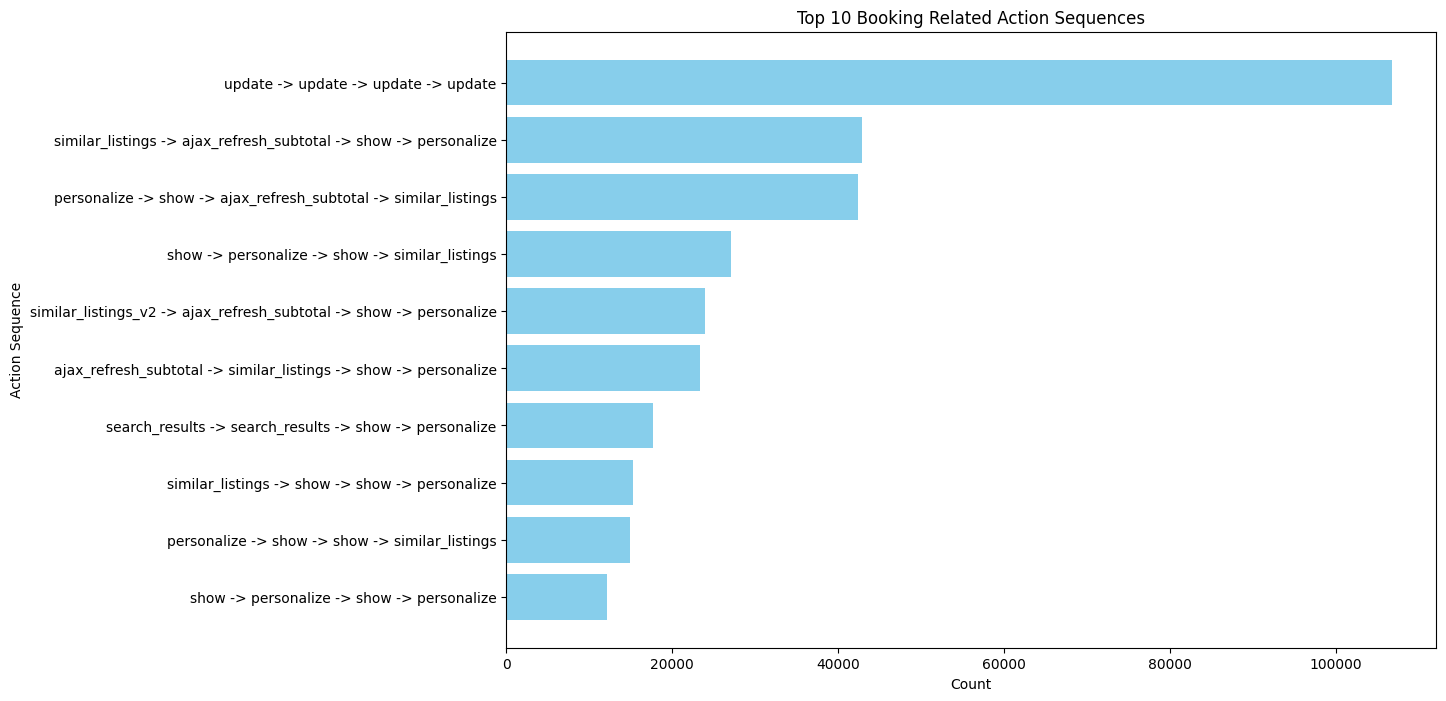

Step: Account Creation, Number of users: 47792
Step: Browse & Search, Number of users: 38912
Step: Interaction & Personalization, Number of users: 43057
Step: Booking or Purchase, Number of users: 54097
Funnel Counts: {'Account Creation': 47792, 'Browse & Search': 38912, 'Interaction & Personalization': 43057, 'Booking or Purchase': 54097}


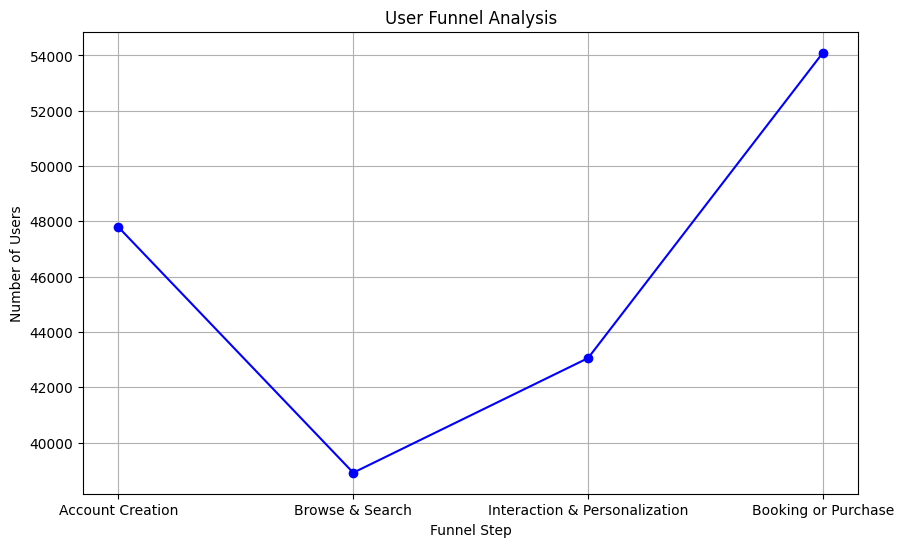

Conversion rate from Account Creation to Browse & Search: 81.42%
Conversion rate from Browse & Search to Interaction & Personalization: 110.65%
Conversion rate from Interaction & Personalization to Booking or Purchase: 125.64%


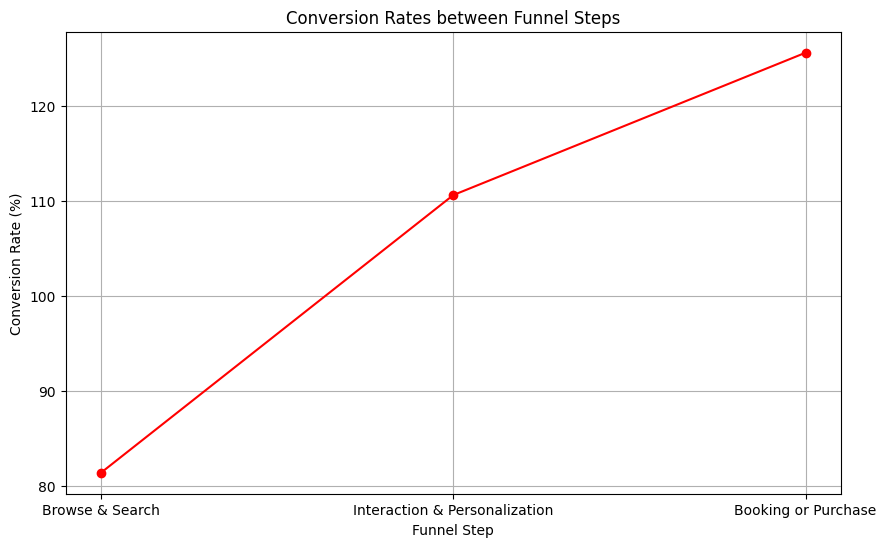

In [2]:
from google.colab import drive
import os
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

# Google Drive 마운트
drive.mount('/content/drive')

# 작업 디렉토리로 이동
working_dir = '/content/drive/MyDrive'
os.makedirs(working_dir, exist_ok=True)
os.chdir(working_dir)

# 파일 경로 설정
file_paths = {
    'age_gender_bkts': os.path.join(working_dir, 'age_gender_bkts.csv'),
    'countries': os.path.join(working_dir, 'countries.csv'),
    'sample_submission_NDF': os.path.join(working_dir, 'sample_submission_NDF.csv'),
    'sessions': os.path.join(working_dir, 'session2.csv'),
    'test_users': os.path.join(working_dir, 'test_users.csv'),
    'train_users_2': os.path.join(working_dir, 'train_users_2.csv')
}

# 파일 읽기
age_gender_bkts = pd.read_csv(file_paths['age_gender_bkts'])
countries = pd.read_csv(file_paths['countries'])
sample_submission_NDF = pd.read_csv(file_paths['sample_submission_NDF'])
df_sessions = pd.read_csv(file_paths['sessions'])
test_users = pd.read_csv(file_paths['test_users'])
df_train = pd.read_csv(file_paths['train_users_2'])

print("Files loaded from Google Drive.")

# 데이터 병합 (사용자 ID를 기준으로)
merged_df = pd.merge(df_sessions, df_train, left_on='user_id', right_on='id', how='inner')

print("Merged Data Sample:")
print(merged_df.head(), "\n")

# 예약 관련 행동 정의 (고유값 파일을 참조하여 확장)
booking_related_actions = [
    'booking_request', 'checkout', 'payment', 'submit', 'booking_response',
    'update', 'change_trip_characteristics', 'wishlist_content_update',
    'view_search_results', 'personalize', 'user_profile', 'similar_listings', 'listing_reviews'
]

# 세션 데이터에서 실제로 존재하는 예약 관련 행동만 필터링
actual_booking_actions = df_sessions[df_sessions['action'].isin(booking_related_actions)]['action'].unique()
print("Actual Booking Related Actions in Data:")
print(actual_booking_actions, "\n")

# 실제 존재하는 행동만 사용하여 리스트 재정의
booking_related_actions = list(set(actual_booking_actions))
print("Filtered Booking Related Actions:")
print(booking_related_actions, "\n")

# 사용자별 행동 시퀀스 추출
user_sequences = df_sessions.groupby('user_id')['action'].apply(list).reset_index()
print("Sample User Sequences:")
print(user_sequences.head(), "\n")

# 예약 행동 시퀀스 분석
pattern_counts = Counter()

# 예약 행동 직전의 행동 패턴 파악
for sequence in user_sequences['action']:
    for i in range(len(sequence)):
        if sequence[i] in booking_related_actions:
            # 예약 행동 전 3개의 행동과 현재 행동을 패턴으로 저장
            pattern = tuple(sequence[max(0, i-3):i+1])
            pattern_counts[pattern] += 1

# 가장 빈번한 행동 시퀀스 패턴을 출력
sorted_patterns = sorted(pattern_counts.items(), key=lambda x: x[1], reverse=True)
print("Top Booking Sequences:")
for pattern, count in sorted_patterns[:10]:  # 상위 10개의 패턴
    print(f"Pattern: {pattern}, Count: {count}")

# 예약 행동 직전의 상위 행동 시퀀스 시각화
if sorted_patterns:
    patterns, counts = zip(*sorted_patterns[:10])
    patterns_str = [' -> '.join(pattern) for pattern in patterns]

    plt.figure(figsize=(12, 8))
    plt.barh(patterns_str, counts, color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Action Sequence')
    plt.title('Top 10 Booking Related Action Sequences')
    plt.gca().invert_yaxis()  # 위에서 아래로 가장 빈번한 패턴을 표시
    plt.show()
else:
    print("No booking sequences found.")

# 퍼널 단계를 정의하기 위해 주요 행동 시퀀스를 바탕으로 단계 설정
funnel_steps = {
    'Account Creation': ['index', 'signup'],
    'Browse & Search': ['search_results', 'view_search_results', 'search'],
    'Interaction & Personalization': ['personalize', 'user_profile', 'similar_listings', 'listing_reviews', 'wishlist'],
    'Booking or Purchase': booking_related_actions  # 이미 필터링된 예약 관련 행동
}

# 각 단계별로 고유 사용자 수 계산
unique_users_per_step = {}

for step, actions in funnel_steps.items():
    users_in_step = merged_df[merged_df['action'].isin(actions)]['user_id'].drop_duplicates()
    unique_users_per_step[step] = users_in_step
    print(f"Step: {step}, Number of users: {len(users_in_step)}")

# 단계별로 사용자 수를 계산하고 리스트로 변환
funnel_counts = {step: len(users) for step, users in unique_users_per_step.items()}
print("Funnel Counts:", funnel_counts)

# 결과 시각화
steps = list(funnel_counts.keys())
counts = list(funnel_counts.values())

plt.figure(figsize=(10, 6))
plt.plot(steps, counts, marker='o', linestyle='-', color='b')
plt.xlabel('Funnel Step')
plt.ylabel('Number of Users')
plt.title('User Funnel Analysis')
plt.grid(True)
plt.show()

# 각 단계별 전환율 계산
conversion_rates = []
for i in range(len(counts) - 1):
    conversion_rate = (counts[i + 1] / counts[i]) * 100 if counts[i] != 0 else 0  # 백분율 계산
    conversion_rates.append(conversion_rate)
    print(f"Conversion rate from {steps[i]} to {steps[i+1]}: {conversion_rate:.2f}%")

# 전환율 시각화
plt.figure(figsize=(10, 6))
plt.plot(steps[1:], conversion_rates, marker='o', linestyle='-', color='r')
plt.xlabel('Funnel Step')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rates between Funnel Steps')
plt.grid(True)
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files loaded from Google Drive.
Merged Data Sample:
      user_id          action action_type        action_detail  \
0  d1mm9tcy42          lookup         NaN                  NaN   
1  d1mm9tcy42  search_results       click  view_search_results   
2  d1mm9tcy42          lookup         NaN                  NaN   
3  d1mm9tcy42  search_results       click  view_search_results   
4  d1mm9tcy42          lookup         NaN                  NaN   

       device_type  secs_elapsed          id date_account_created  \
0  Windows Desktop         319.0  d1mm9tcy42           2014-01-01   
1  Windows Desktop       67753.0  d1mm9tcy42           2014-01-01   
2  Windows Desktop         301.0  d1mm9tcy42           2014-01-01   
3  Windows Desktop       22141.0  d1mm9tcy42           2014-01-01   
4  Windows Desktop         435.0  d1mm9tcy42           2014-01-01   

   time

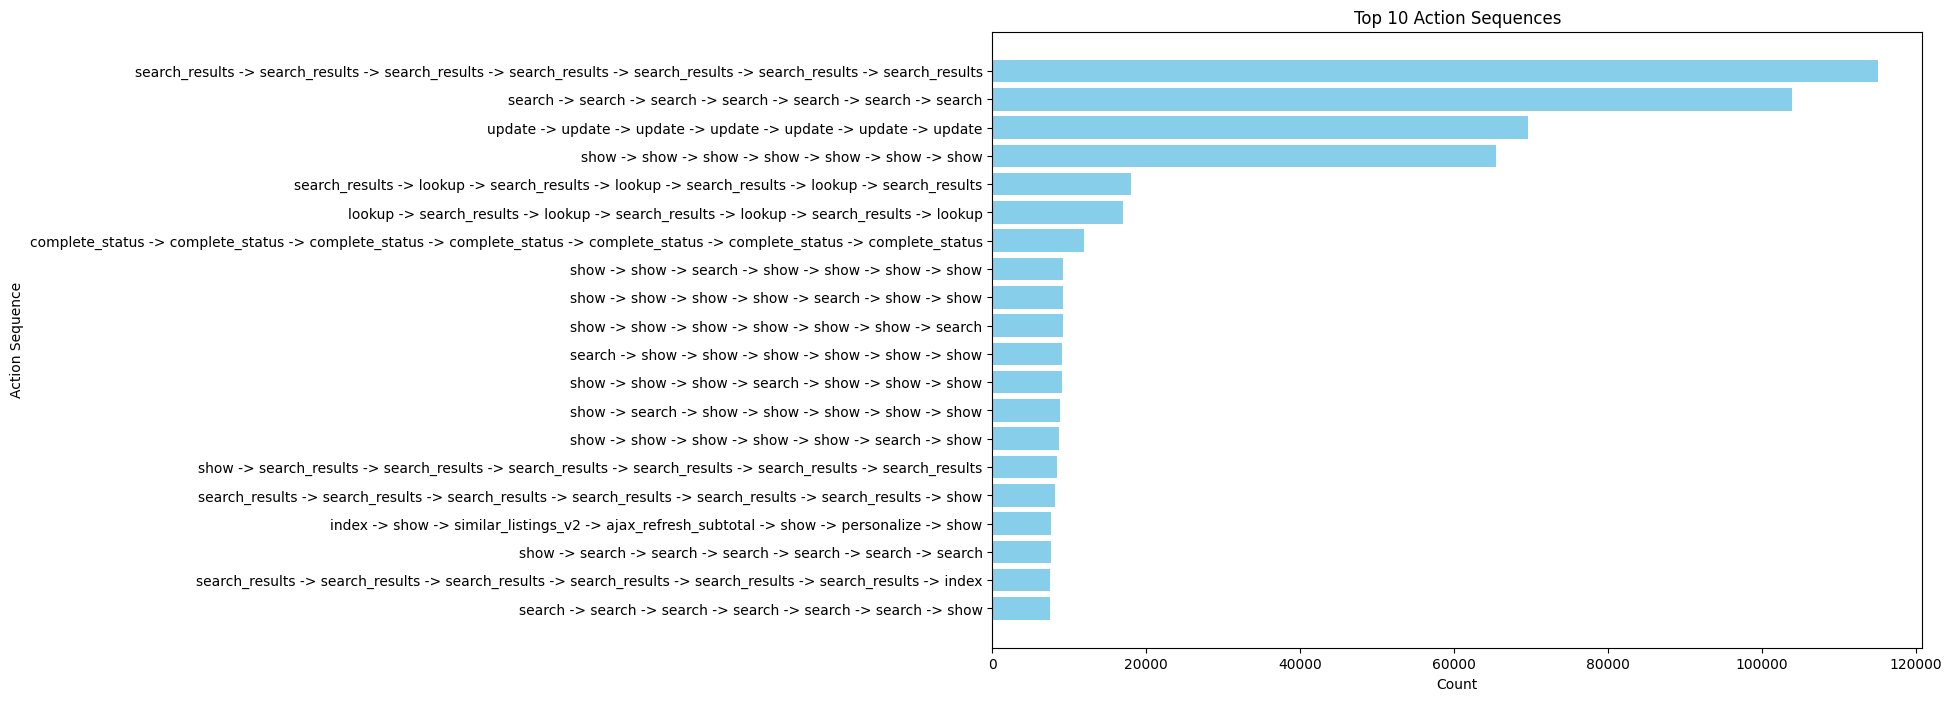

In [6]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 디렉토리로 이동
working_dir = '/content/drive/MyDrive'
os.makedirs(working_dir, exist_ok=True)
os.chdir(working_dir)

# 파일 경로 설정
file_paths = {
    'sessions': os.path.join(working_dir, 'session2.csv'),
    'train_users_2': os.path.join(working_dir, 'train_users_2.csv')
}

# 파일 읽기
df_sessions = pd.read_csv(file_paths['sessions'])
df_train = pd.read_csv(file_paths['train_users_2'])

print("Files loaded from Google Drive.")

# 데이터 병합 (사용자 ID를 기준으로)
merged_df = pd.merge(df_sessions, df_train, left_on='user_id', right_on='id', how='inner')

print("Merged Data Sample:")
print(merged_df.head(), "\n")

# 사용자별 행동 시퀀스 추출
user_sequences = df_sessions.groupby('user_id')['action'].apply(list).reset_index()
print("Sample User Sequences:")
print(user_sequences.head(), "\n")

# 전체 행동 시퀀스 분석
pattern_counts = Counter()

# 모든 행동 시퀀스를 분석하여 패턴을 파악
for sequence in user_sequences['action']:
    for i in range(len(sequence)):
        # 시퀀스의 각 행동을 패턴으로 저장 (연속된 7개 행동)
        if i + 6 < len(sequence):
            pattern = tuple(sequence[i:i+7])
            pattern_counts[pattern] += 1

# 가장 빈번한 행동 시퀀스 패턴을 출력
sorted_patterns = sorted(pattern_counts.items(), key=lambda x: x[1], reverse=True)
print("Top Sequences:")
for pattern, count in sorted_patterns[:20]:  # 상위 10개의 패턴
    print(f"Pattern: {pattern}, Count: {count}")

# 행동 시퀀스 패턴 시각화
if sorted_patterns:
    patterns, counts = zip(*sorted_patterns[:20])
    patterns_str = [' -> '.join(pattern) for pattern in patterns]

    plt.figure(figsize=(12, 8))
    plt.barh(patterns_str, counts, color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Action Sequence')
    plt.title('Top 10 Action Sequences')
    plt.gca().invert_yaxis()  # 위에서 아래로 가장 빈번한 패턴을 표시
    plt.show()
else:
    print("No sequences found.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files loaded from Google Drive.
Merged Data Sample:
      user_id          action action_type        action_detail  \
0  d1mm9tcy42          lookup         NaN                  NaN   
1  d1mm9tcy42  search_results       click  view_search_results   
2  d1mm9tcy42          lookup         NaN                  NaN   
3  d1mm9tcy42  search_results       click  view_search_results   
4  d1mm9tcy42          lookup         NaN                  NaN   

       device_type  secs_elapsed          id date_account_created  \
0  Windows Desktop         319.0  d1mm9tcy42           2014-01-01   
1  Windows Desktop       67753.0  d1mm9tcy42           2014-01-01   
2  Windows Desktop         301.0  d1mm9tcy42           2014-01-01   
3  Windows Desktop       22141.0  d1mm9tcy42           2014-01-01   
4  Windows Desktop         435.0  d1mm9tcy42           2014-01-01   

   time

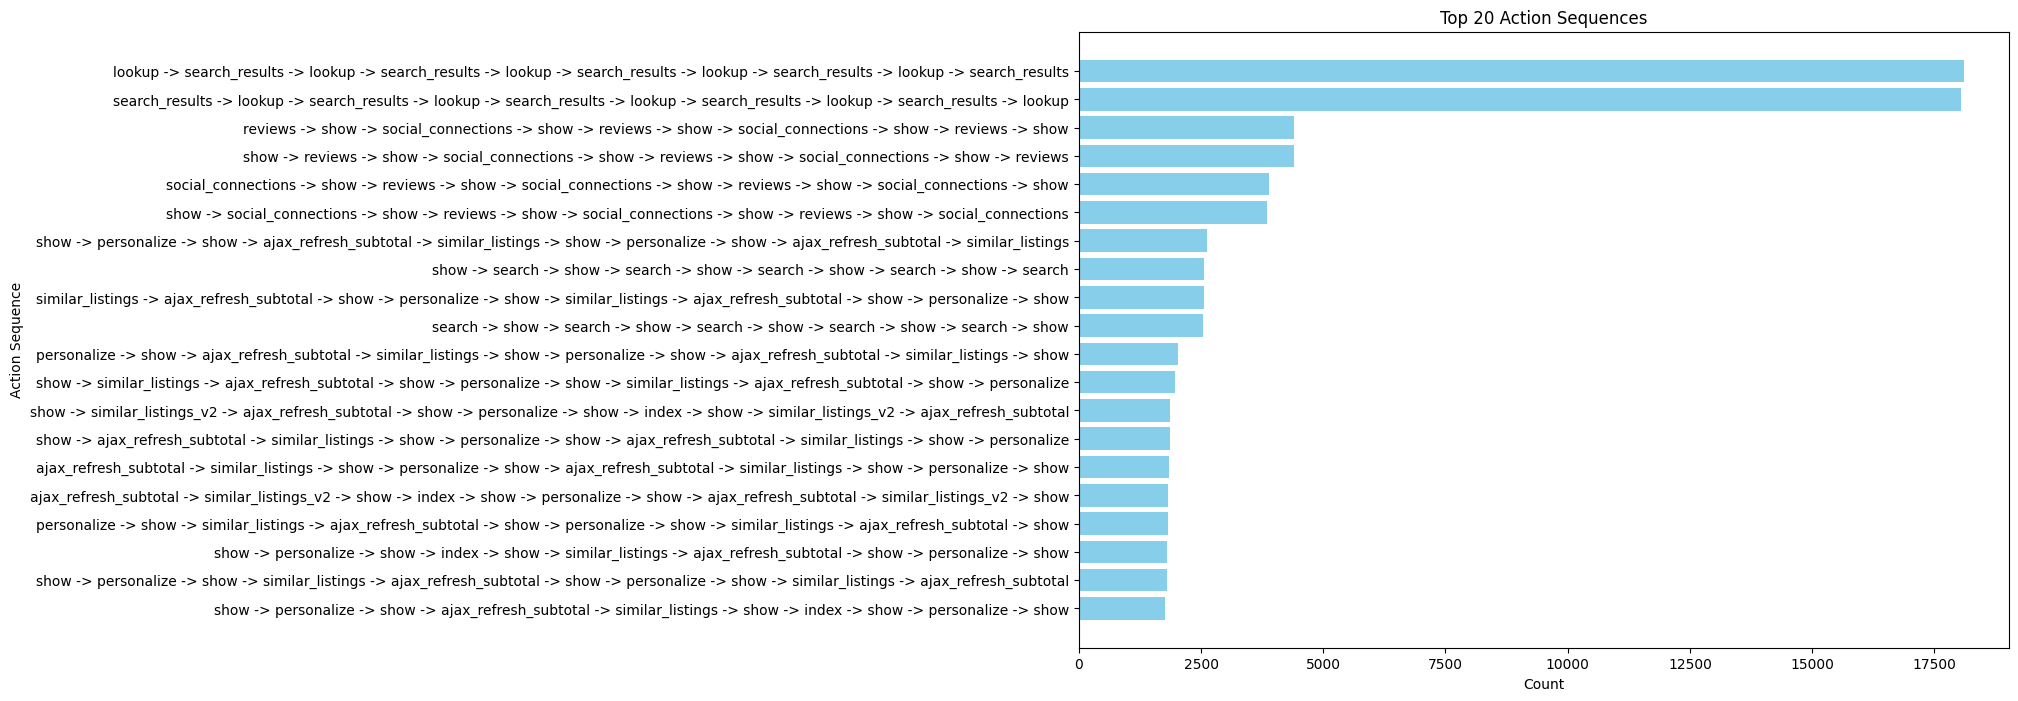

In [8]:
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# 작업 디렉토리로 이동
working_dir = '/content/drive/MyDrive'
os.makedirs(working_dir, exist_ok=True)
os.chdir(working_dir)

# 파일 경로 설정
file_paths = {
    'sessions': os.path.join(working_dir, 'session2.csv'),
    'train_users_2': os.path.join(working_dir, 'train_users_2.csv')
}

# 파일 읽기
df_sessions = pd.read_csv(file_paths['sessions'])
df_train = pd.read_csv(file_paths['train_users_2'])

print("Files loaded from Google Drive.")

# 데이터 병합 (사용자 ID를 기준으로)
merged_df = pd.merge(df_sessions, df_train, left_on='user_id', right_on='id', how='inner')

print("Merged Data Sample:")
print(merged_df.head(), "\n")

# 사용자별 행동 시퀀스 추출
def compress_sequence(sequence):
    """연속된 동일한 행동을 하나로 압축"""
    compressed = []
    previous_action = None
    for action in sequence:
        if action != previous_action:
            compressed.append(action)
        previous_action = action
    return compressed

user_sequences = df_sessions.groupby('user_id')['action'].apply(compress_sequence).reset_index()
print("Sample User Sequences:")
print(user_sequences.head(), "\n")

# 전체 행동 시퀀스 분석
pattern_counts = Counter()

# 모든 행동 시퀀스를 분석하여 패턴을 파악
for sequence in user_sequences['action']:
    for i in range(len(sequence)):
        # 시퀀스의 각 행동을 패턴으로 저장 (연속된 10개 행동)
        if i + 9 < len(sequence):
            pattern = tuple(sequence[i:i+10])
            pattern_counts[pattern] += 1

# 가장 빈번한 행동 시퀀스 패턴을 출력
sorted_patterns = sorted(pattern_counts.items(), key=lambda x: x[1], reverse=True)
print("Top Sequences:")
for pattern, count in sorted_patterns[:20]:  # 상위 20개의 패턴
    print(f"Pattern: {pattern}, Count: {count}")

# 행동 시퀀스 패턴 시각화
if sorted_patterns:
    patterns, counts = zip(*sorted_patterns[:20])
    patterns_str = [' -> '.join(pattern) for pattern in patterns]

    plt.figure(figsize=(12, 8))
    plt.barh(patterns_str, counts, color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Action Sequence')
    plt.title('Top 20 Action Sequences')
    plt.gca().invert_yaxis()  # 위에서 아래로 가장 빈번한 패턴을 표시
    plt.show()
else:
    print("No sequences found.")
